In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Import csv
steel = pd.read_csv('Resources/X.csv')
steel.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change
0,0,1/2/2019,17.790001,18.820000,17.639999,18.510000,18.265318,7803700,Positive,NaN,NaN,-0.030000
1,1,1/3/2019,18.379999,18.920000,18.270000,18.480000,18.235712,8359100,Negative,-0.030000,-0.162075,1.860000
2,2,1/4/2019,18.840000,20.540001,18.780001,20.340000,20.071125,10737800,Positive,1.860000,10.064935,0.110001
3,3,1/7/2019,20.930000,21.000000,20.160000,20.450001,20.179674,12320700,Positive,0.110001,0.540811,0.250000
4,4,1/8/2019,20.570000,21.200001,20.360001,20.700001,20.426369,8463400,Positive,0.250000,1.222494,0.139999


In [4]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = steel["Volume"].values.reshape(-1, 1)
y = steel["Close"].values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (252, 1) (252, 1)


Text(0, 0.5, 'Closing Price')

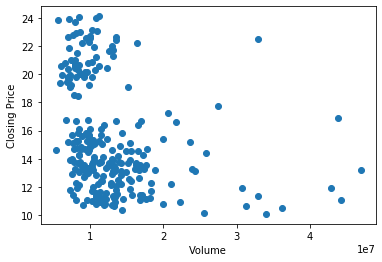

In [5]:
# Plot the data to see if a linear trend exists

### BEGIN SOLUTION
plt.scatter(X, y)
plt.xlabel("Volume")
plt.ylabel("Closing Price")
### END SOLUTION

In [6]:
# Import csv
sentiment_df = pd.read_csv('TweetSentiment.csv')
sentiment_df.head()

,tweetdate,compound,neg,neu,pos
0,2018-01-01,0.271533,0.116333,0.681667,0.201667
1,2018-01-02,0.567400,0.080154,0.709692,0.210231
2,2018-01-03,0.113950,0.094750,0.782750,0.122500
3,2018-01-04,-0.029990,0.113300,0.779300,0.107300
4,2018-01-05,-0.083683,0.072833,0.851667,0.075833


In [7]:
sentiment_df['tweetdate'] = pd.to_datetime(sentiment_df['tweetdate'])

C:\Users\bchee\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Tweet Sentiment')

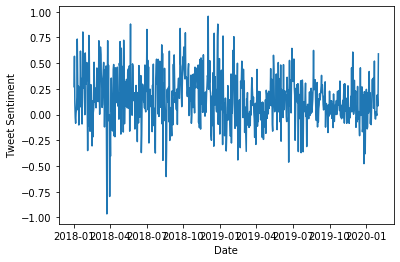

In [8]:
plt.plot(sentiment_df["tweetdate"], sentiment_df["compound"])
plt.xlabel("Date")
plt.ylabel("Tweet Sentiment")

In [9]:
steel['Date'] = pd.to_datetime(steel['Date'])

In [10]:
merged_df = pd.merge(steel, sentiment_df, how='inner', left_on='Date', right_on='tweetdate')
merged_df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,P/N,Daily_Change,Daily_%_Change,Future_Change,tweetdate,compound,neg,neu,pos
0,0,2019-01-02,17.790001,18.820000,17.639999,18.510000,18.265318,7803700,Positive,NaN,NaN,-0.030000,2019-01-02,0.332267,0.053667,0.755333,0.191000
1,1,2019-01-03,18.379999,18.920000,18.270000,18.480000,18.235712,8359100,Negative,-0.030000,-0.162075,1.860000,2019-01-03,0.307300,0.051000,0.788333,0.160778
2,2,2019-01-04,18.840000,20.540001,18.780001,20.340000,20.071125,10737800,Positive,1.860000,10.064935,0.110001,2019-01-04,0.431943,0.033571,0.783000,0.183429
3,3,2019-01-07,20.930000,21.000000,20.160000,20.450001,20.179674,12320700,Positive,0.110001,0.540811,0.250000,2019-01-07,-0.290933,0.150833,0.731667,0.117500
4,4,2019-01-08,20.570000,21.200001,20.360001,20.700001,20.426369,8463400,Positive,0.250000,1.222494,0.139999,2019-01-08,0.764440,0.054200,0.646600,0.299000


In [11]:
merged_df.to_csv('XstockMerged.csv', index = False)

In [12]:
#df=merged_df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Future_Change', 'compound', 'neg', 'neu', 'pos', 'P/N']]
df=merged_df[['neg', 'neu', 'pos', 'P/N']]
df.head()

,neg,neu,pos,P/N
0,0.053667,0.755333,0.191000,Positive
1,0.051000,0.788333,0.160778,Negative
2,0.033571,0.783000,0.183429,Positive
3,0.150833,0.731667,0.117500,Positive
4,0.054200,0.646600,0.299000,Positive


In [13]:
# This is just a test to see correlation
corr_df=merged_df[['Daily_Change', 'Future_Change', 'neg', 'neu', 'pos', 'compound']]
corr_df.corr()

,Daily_Change,Future_Change,neg,neu,pos,compound
Daily_Change,1.000000,0.016771,-0.021466,0.051964,-0.049149,0.037830
Future_Change,0.016771,1.000000,0.011170,0.017215,-0.029621,-0.013668
neg,-0.021466,0.011170,1.000000,-0.397627,-0.328864,-0.710412
neu,0.051964,0.017215,-0.397627,1.000000,-0.726758,-0.143955
pos,-0.049149,-0.029621,-0.328864,-0.726758,1.000000,0.673199
compound,0.037830,-0.013668,-0.710412,-0.143955,0.673199,1.000000


In [14]:
from sklearn.preprocessing import LabelEncoder
# One Hot encoding
# Step 0: Reformat data
data = df.values
X = data[:, 0:3]
y = data[:, 3]

# # Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [15]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)

Using TensorFlow backend.


In [16]:
from sklearn.model_selection import train_test_split
# splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, one_hot_y)

In [17]:
from sklearn.preprocessing import StandardScaler
# Scaling data for use in the model
X_scaler = StandardScaler().fit(X_train)

# Scaling both training and testing
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [18]:
from tensorflow.keras.utils import to_categorical

In [19]:
from tensorflow.keras.models import Sequential

deep_model = Sequential()

In [20]:
from tensorflow.keras.layers import Dense
number_inputs = 3
number_hidden_nodes = 10
deep_model.add(Dense(units=number_hidden_nodes, activation='relu', input_dim=number_inputs))
deep_model.add(Dense(units=number_hidden_nodes, activation='relu'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [21]:
number_classes = 2
deep_model.add(Dense(units=number_classes, activation='softmax'))

In [22]:
deep_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                40        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 172
Trainable params: 172
Non-trainable params: 0
_________________________________________________________________


In [23]:
deep_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
# Fit (train) the model
deep_model.fit(
    X_train_scaled,
    y_train,
    epochs=1000,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
189/189 - 0s - loss: 0.8220 - acc: 0.5767
Epoch 2/1000
189/189 - 0s - loss: 0.7956 - acc: 0.5767
Epoch 3/1000
189/189 - 0s - loss: 0.7769 - acc: 0.5767
Epoch 4/1000
189/189 - 0s - loss: 0.7619 - acc: 0.5820
Epoch 5/1000
189/189 - 0s - loss: 0.7504 - acc: 0.6032
Epoch 6/1000
189/189 - 0s - loss: 0.7368 - acc: 0.5926
Epoch 7/1000
189/189 - 0s - loss: 0.7295 - acc: 0.5714
Epoch 8/1000
189/189 - 0s - loss: 0.7238 - acc: 0.5503
Epoch 9/1000
189/189 - 0s - loss: 0.7169 - acc: 0.5344
Epoch 10/1000
189/189 - 0s - loss: 0.7137 - acc: 0.5238
Epoch 11/1000
189/189 - 0s - loss: 0.7106 - acc: 0.5185
Epoch 12/1000
189/189 - 0s - loss: 0.7078 - acc: 0.5344
Epoch 13/1000
189/189 - 0s - loss: 0.7049 - acc: 0.5397
Epoch 14/1000
189/189 - 0s - loss: 0.7029 - acc: 0.5397
Epoch 15/1000
189/189 - 0s - loss: 0.7012 - acc: 0.5397
Epoch 16/1000
189/189 - 0s - loss: 0.6994 - acc: 0.5344
Epoch 17/1000
189/189 - 0s - loss: 0.6980 - acc: 0.5397
Epoch 18/1000
189/189 - 0s - loss: 0.6973 - acc: 0.5344
E

Epoch 147/1000
189/189 - 0s - loss: 0.6594 - acc: 0.6085
Epoch 148/1000
189/189 - 0s - loss: 0.6593 - acc: 0.6138
Epoch 149/1000
189/189 - 0s - loss: 0.6594 - acc: 0.6085
Epoch 150/1000
189/189 - 0s - loss: 0.6590 - acc: 0.6138
Epoch 151/1000
189/189 - 0s - loss: 0.6592 - acc: 0.6032
Epoch 152/1000
189/189 - 0s - loss: 0.6587 - acc: 0.6085
Epoch 153/1000
189/189 - 0s - loss: 0.6588 - acc: 0.6085
Epoch 154/1000
189/189 - 0s - loss: 0.6584 - acc: 0.6085
Epoch 155/1000
189/189 - 0s - loss: 0.6586 - acc: 0.6085
Epoch 156/1000
189/189 - 0s - loss: 0.6586 - acc: 0.6085
Epoch 157/1000
189/189 - 0s - loss: 0.6591 - acc: 0.6138
Epoch 158/1000
189/189 - 0s - loss: 0.6588 - acc: 0.6085
Epoch 159/1000
189/189 - 0s - loss: 0.6580 - acc: 0.6032
Epoch 160/1000
189/189 - 0s - loss: 0.6584 - acc: 0.6138
Epoch 161/1000
189/189 - 0s - loss: 0.6581 - acc: 0.6138
Epoch 162/1000
189/189 - 0s - loss: 0.6586 - acc: 0.6032
Epoch 163/1000
189/189 - 0s - loss: 0.6578 - acc: 0.6085
Epoch 164/1000
189/189 - 0s - l

Epoch 291/1000
189/189 - 0s - loss: 0.6460 - acc: 0.6243
Epoch 292/1000
189/189 - 0s - loss: 0.6456 - acc: 0.6243
Epoch 293/1000
189/189 - 0s - loss: 0.6454 - acc: 0.6296
Epoch 294/1000
189/189 - 0s - loss: 0.6454 - acc: 0.6243
Epoch 295/1000
189/189 - 0s - loss: 0.6453 - acc: 0.6296
Epoch 296/1000
189/189 - 0s - loss: 0.6452 - acc: 0.6296
Epoch 297/1000
189/189 - 0s - loss: 0.6450 - acc: 0.6296
Epoch 298/1000
189/189 - 0s - loss: 0.6456 - acc: 0.6296
Epoch 299/1000
189/189 - 0s - loss: 0.6449 - acc: 0.6296
Epoch 300/1000
189/189 - 0s - loss: 0.6445 - acc: 0.6296
Epoch 301/1000
189/189 - 0s - loss: 0.6459 - acc: 0.6296
Epoch 302/1000
189/189 - 0s - loss: 0.6457 - acc: 0.6296
Epoch 303/1000
189/189 - 0s - loss: 0.6454 - acc: 0.6243
Epoch 304/1000
189/189 - 0s - loss: 0.6447 - acc: 0.6243
Epoch 305/1000
189/189 - 0s - loss: 0.6445 - acc: 0.6243
Epoch 306/1000
189/189 - 0s - loss: 0.6443 - acc: 0.6296
Epoch 307/1000
189/189 - 0s - loss: 0.6443 - acc: 0.6296
Epoch 308/1000
189/189 - 0s - l

Epoch 435/1000
189/189 - 0s - loss: 0.6332 - acc: 0.6243
Epoch 436/1000
189/189 - 0s - loss: 0.6331 - acc: 0.6243
Epoch 437/1000
189/189 - 0s - loss: 0.6336 - acc: 0.6296
Epoch 438/1000
189/189 - 0s - loss: 0.6332 - acc: 0.6243
Epoch 439/1000
189/189 - 0s - loss: 0.6330 - acc: 0.6296
Epoch 440/1000
189/189 - 0s - loss: 0.6330 - acc: 0.6243
Epoch 441/1000
189/189 - 0s - loss: 0.6332 - acc: 0.6243
Epoch 442/1000
189/189 - 0s - loss: 0.6334 - acc: 0.6190
Epoch 443/1000
189/189 - 0s - loss: 0.6330 - acc: 0.6138
Epoch 444/1000
189/189 - 0s - loss: 0.6327 - acc: 0.6243
Epoch 445/1000
189/189 - 0s - loss: 0.6331 - acc: 0.6243
Epoch 446/1000
189/189 - 0s - loss: 0.6329 - acc: 0.6190
Epoch 447/1000
189/189 - 0s - loss: 0.6329 - acc: 0.6243
Epoch 448/1000
189/189 - 0s - loss: 0.6325 - acc: 0.6190
Epoch 449/1000
189/189 - 0s - loss: 0.6322 - acc: 0.6243
Epoch 450/1000
189/189 - 0s - loss: 0.6322 - acc: 0.6243
Epoch 451/1000
189/189 - 0s - loss: 0.6320 - acc: 0.6190
Epoch 452/1000
189/189 - 0s - l

Epoch 579/1000
189/189 - 0s - loss: 0.6239 - acc: 0.6402
Epoch 580/1000
189/189 - 0s - loss: 0.6241 - acc: 0.6402
Epoch 581/1000
189/189 - 0s - loss: 0.6238 - acc: 0.6402
Epoch 582/1000
189/189 - 0s - loss: 0.6237 - acc: 0.6402
Epoch 583/1000
189/189 - 0s - loss: 0.6244 - acc: 0.6402
Epoch 584/1000
189/189 - 0s - loss: 0.6244 - acc: 0.6349
Epoch 585/1000
189/189 - 0s - loss: 0.6234 - acc: 0.6349
Epoch 586/1000
189/189 - 0s - loss: 0.6237 - acc: 0.6349
Epoch 587/1000
189/189 - 0s - loss: 0.6240 - acc: 0.6349
Epoch 588/1000
189/189 - 0s - loss: 0.6239 - acc: 0.6349
Epoch 589/1000
189/189 - 0s - loss: 0.6238 - acc: 0.6455
Epoch 590/1000
189/189 - 0s - loss: 0.6233 - acc: 0.6402
Epoch 591/1000
189/189 - 0s - loss: 0.6237 - acc: 0.6402
Epoch 592/1000
189/189 - 0s - loss: 0.6230 - acc: 0.6402
Epoch 593/1000
189/189 - 0s - loss: 0.6237 - acc: 0.6296
Epoch 594/1000
189/189 - 0s - loss: 0.6233 - acc: 0.6455
Epoch 595/1000
189/189 - 0s - loss: 0.6227 - acc: 0.6402
Epoch 596/1000
189/189 - 0s - l

Epoch 723/1000
189/189 - 0s - loss: 0.6167 - acc: 0.6455
Epoch 724/1000
189/189 - 0s - loss: 0.6167 - acc: 0.6402
Epoch 725/1000
189/189 - 0s - loss: 0.6164 - acc: 0.6455
Epoch 726/1000
189/189 - 0s - loss: 0.6162 - acc: 0.6455
Epoch 727/1000
189/189 - 0s - loss: 0.6161 - acc: 0.6402
Epoch 728/1000
189/189 - 0s - loss: 0.6156 - acc: 0.6455
Epoch 729/1000
189/189 - 0s - loss: 0.6159 - acc: 0.6455
Epoch 730/1000
189/189 - 0s - loss: 0.6159 - acc: 0.6455
Epoch 731/1000
189/189 - 0s - loss: 0.6161 - acc: 0.6455
Epoch 732/1000
189/189 - 0s - loss: 0.6160 - acc: 0.6455
Epoch 733/1000
189/189 - 0s - loss: 0.6158 - acc: 0.6455
Epoch 734/1000
189/189 - 0s - loss: 0.6157 - acc: 0.6402
Epoch 735/1000
189/189 - 0s - loss: 0.6159 - acc: 0.6455
Epoch 736/1000
189/189 - 0s - loss: 0.6159 - acc: 0.6455
Epoch 737/1000
189/189 - 0s - loss: 0.6173 - acc: 0.6455
Epoch 738/1000
189/189 - 0s - loss: 0.6161 - acc: 0.6402
Epoch 739/1000
189/189 - 0s - loss: 0.6149 - acc: 0.6508
Epoch 740/1000
189/189 - 0s - l

Epoch 867/1000
189/189 - 0s - loss: 0.6097 - acc: 0.6455
Epoch 868/1000
189/189 - 0s - loss: 0.6094 - acc: 0.6455
Epoch 869/1000
189/189 - 0s - loss: 0.6101 - acc: 0.6455
Epoch 870/1000
189/189 - 0s - loss: 0.6099 - acc: 0.6508
Epoch 871/1000
189/189 - 0s - loss: 0.6091 - acc: 0.6508
Epoch 872/1000
189/189 - 0s - loss: 0.6091 - acc: 0.6402
Epoch 873/1000
189/189 - 0s - loss: 0.6098 - acc: 0.6455
Epoch 874/1000
189/189 - 0s - loss: 0.6107 - acc: 0.6508
Epoch 875/1000
189/189 - 0s - loss: 0.6091 - acc: 0.6508
Epoch 876/1000
189/189 - 0s - loss: 0.6098 - acc: 0.6455
Epoch 877/1000
189/189 - 0s - loss: 0.6089 - acc: 0.6455
Epoch 878/1000
189/189 - 0s - loss: 0.6090 - acc: 0.6508
Epoch 879/1000
189/189 - 0s - loss: 0.6091 - acc: 0.6508
Epoch 880/1000
189/189 - 0s - loss: 0.6102 - acc: 0.6455
Epoch 881/1000
189/189 - 0s - loss: 0.6098 - acc: 0.6455
Epoch 882/1000
189/189 - 0s - loss: 0.6090 - acc: 0.6455
Epoch 883/1000
189/189 - 0s - loss: 0.6110 - acc: 0.6349
Epoch 884/1000
189/189 - 0s - l

In [25]:
model_loss, model_accuracy = deep_model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(f"Deep Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

63/63 - 0s - loss: 0.7371 - acc: 0.5556
Deep Neural Network - Loss: 0.7371126044364202, Accuracy: 0.5555555820465088


In [26]:
y_pred = deep_model.predict(X_test_scaled)

In [27]:
y_test[0:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [28]:
y_pred[0:10]

array([[0.40598294, 0.5940171 ],
       [0.4632661 , 0.5367339 ],
       [0.3024061 , 0.6975939 ],
       [0.59232247, 0.4076775 ],
       [0.43304893, 0.5669511 ],
       [0.62189525, 0.37810478],
       [0.41951331, 0.58048666],
       [0.65786856, 0.34213153],
       [0.47145054, 0.5285495 ],
       [0.48732674, 0.5126733 ]], dtype=float32)